## Title: Exercises from Chapter 3
### Sanjay Jaras

### Import Libraries

In [8]:
import numpy as np

import nsfg
import first
import thinkstats2
import thinkplot

### Read Dataset

In [9]:
resp = nsfg.ReadFemResp()

### Exercise 3.1 
Something like the class size paradox appears if you survey
children and ask how many children are in their family. Families with many
children are more likely to appear in your sample, and families with no chil-
dren have no chance to be in the sample.
Use the NSFG respondent variable NUMKDHH to construct the actual distribu-
tion for the number of children under 18 in the household.
Now compute the biased distribution we would see if we surveyed the children
and asked them how many children under 18 (including themselves) are in
their household.
Plot the actual and biased distributions, and compute their means. As a
starting place, you can use chap03ex.ipynb.

### Define Functions

In [10]:
def biasPmf(pmf, label):
    """ Computes the biased pmf
        Returns:
            biased pmf
    """
    #Copy the pmf so that it will not change
    new_pmf = pmf.Copy(label=label)
    # To show bias multiply number of kids with each observation
    for x, p in pmf.Items():
        new_pmf.Mult(x, x)
    # normalize the PMF after multiplication to make pmf to add up to 1    
    new_pmf.Normalize()
    # return biased PMF
    return new_pmf


    

### Compute and plot actual and observed pmfs

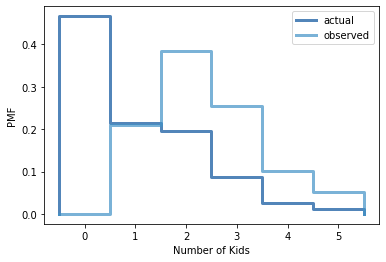

In [11]:
# Calculate actual pmf
pmf = thinkstats2.Pmf(resp["numkdhh"], label='actual')
# calculate biased pmf
biased_pmf = biasPmf(pmf, label='observed')
# plot
thinkplot.PrePlot(2)
# plot actual and biased plot
thinkplot.Pmfs([pmf, biased_pmf])
thinkplot.Config(xlabel='Number of Kids', ylabel='PMF')

### Calculate mean for observed and actual pmf

In [12]:
print('Actual mean', pmf.Mean())
print('Observed mean', biased_pmf.Mean())

Actual mean 1.024205155043831
Observed mean 2.403679100664282


### Exercise 3.2 
In Section 2.7 we computed the mean of a sample by adding
up the elements and dividing by n. If you are given a PMF, you can still
compute the mean, but the process is slightly different:

Xmean = Summation of Pi * Xi for each i

where the x i are the unique values in the PMF and p i = P M F (x i ). Similarly,
you can compute variance like this:

Variance = Summation of Pi * ((Xi - Xmean) * (Xi - Xmean)) 


### Define functions

In [13]:
def pmfMean(pmf):
    """Computes the mean of a PMF.

    Returns:
        float mean
    """
    # initialize mean variable
    mean = 0.0
    # calculate mean by adding all means from each distribution item in pmf
    for x, p in pmf.d.items():
        mean += p * x
    return mean

def pmfVariance(pmf, meanPmf=None):
    """ Computes variance for pmf
        Returns:
        float variance
    """
    # if mean is not passed calculate from pmf
    if meanPmf is None:
        meanPmf = pmf.Mean()
        
    # intialize variance variable    
    variance = 0
    # compute variance by each item
    for x, p in pmf.d.items():
        variance += p * (x - meanPmf) ** 2
    # return variance    
    return variance

In [14]:
print('Mean', pmfMean(pmf))
print('Variance', pmfVariance(pmf))

Mean 1.024205155043831
Variance 1.4128643263531195
